In [1]:
%load_ext jupyter_black

In [2]:
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

from griblib.hrrr import HRRR

In [3]:
hrrr = HRRR(sorted(glob("/workspaces/griblib/data/hrrr/*.grib2"))[:24])
# drr = hrrr.derived_radar_reflectivity()
# drr["refd"]

TypeError: HRRR.__init__() missing 3 required positional arguments: 'hours', 'date_range', and 'fs'

/tmp/ipykernel_12238/2506821890.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(vt.value)


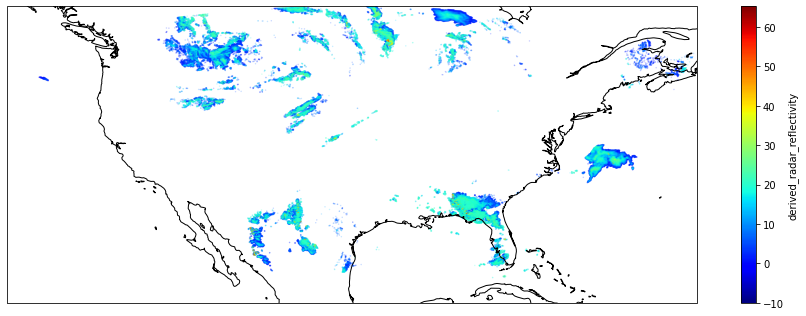

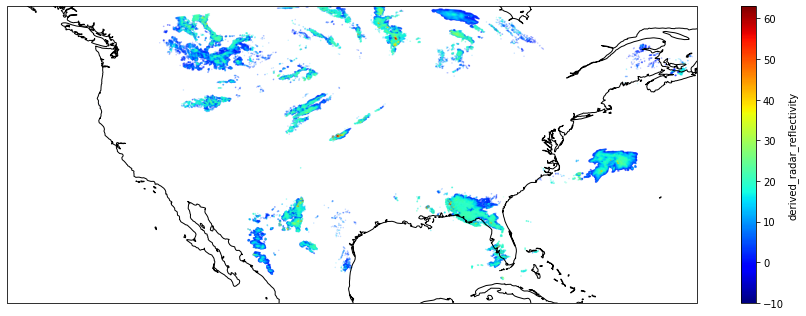

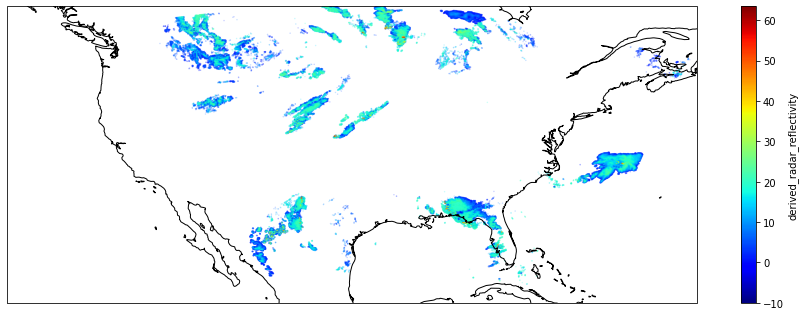

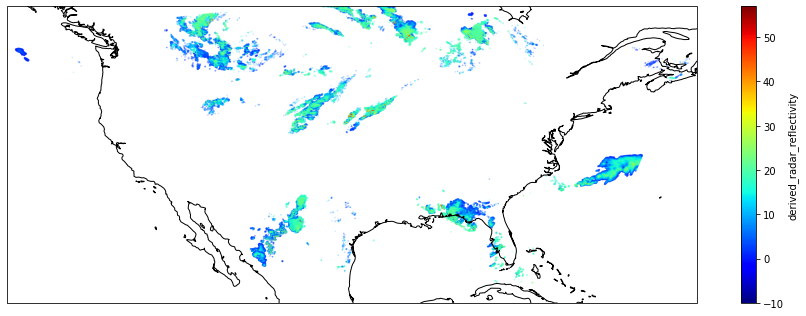

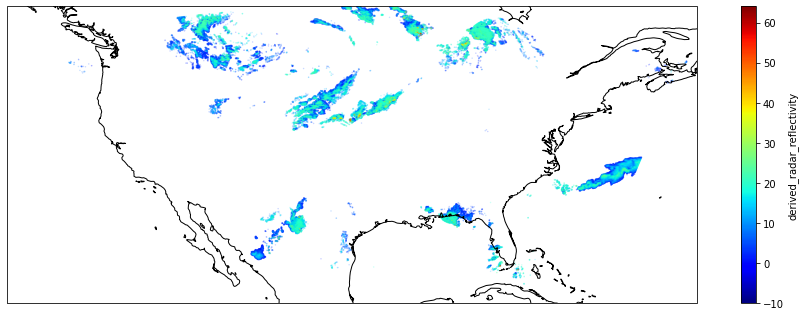

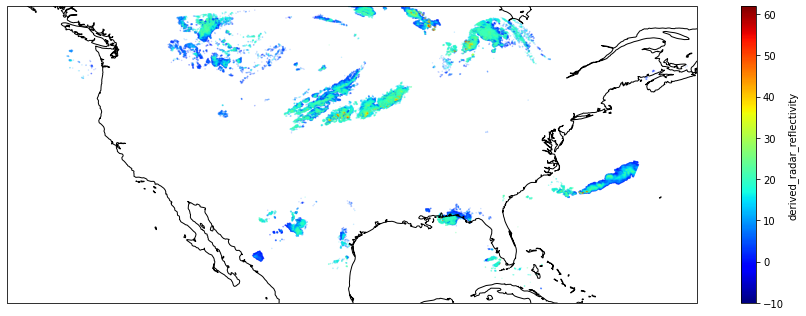

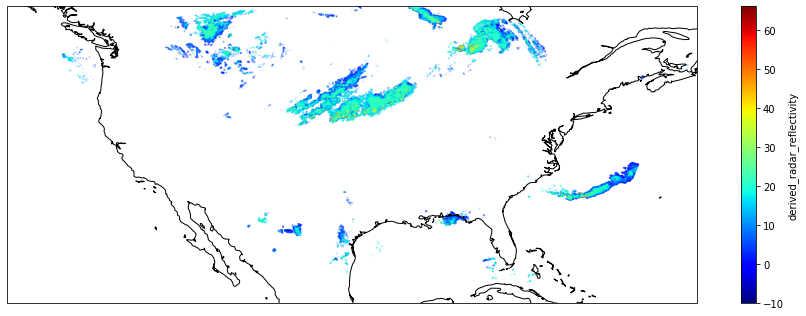

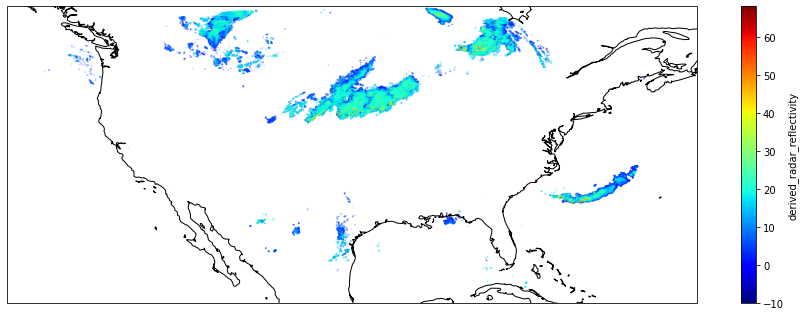

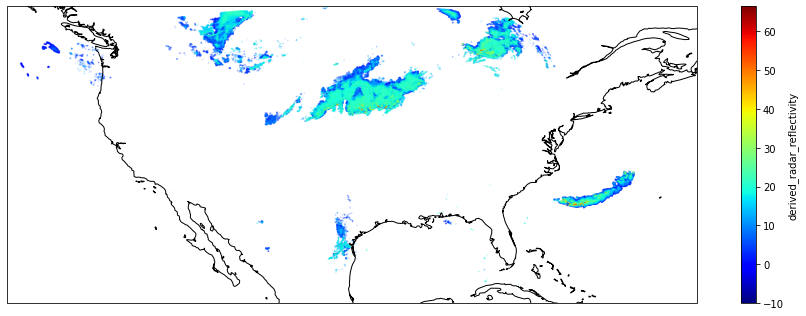

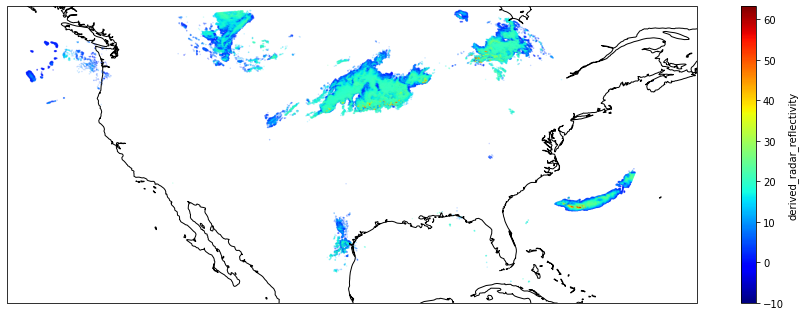

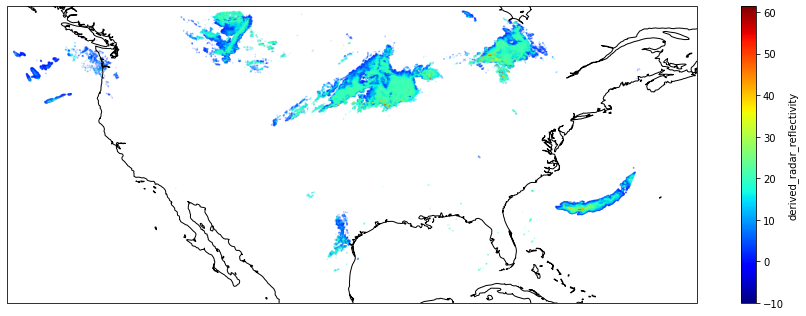

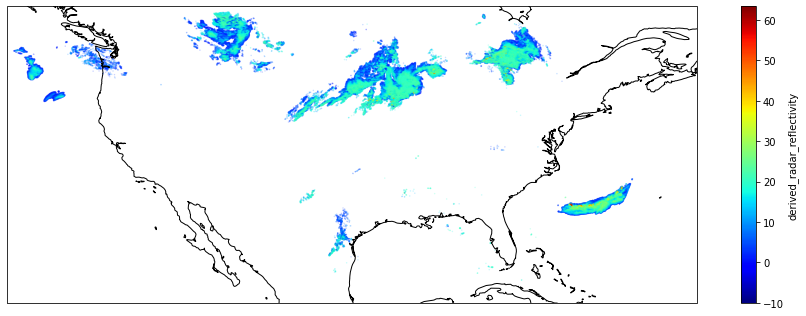

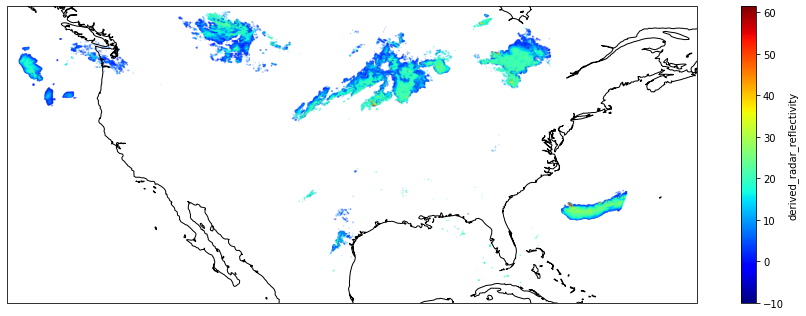

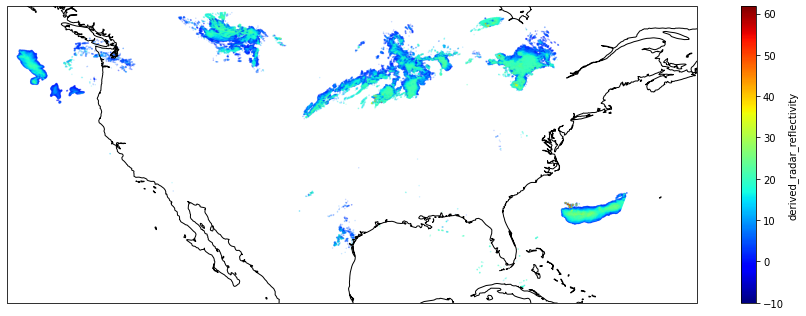

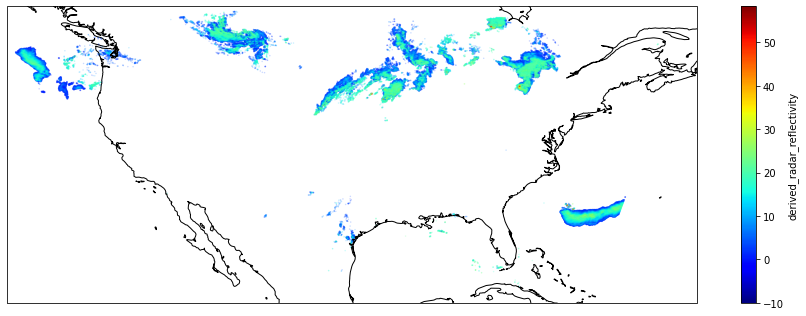

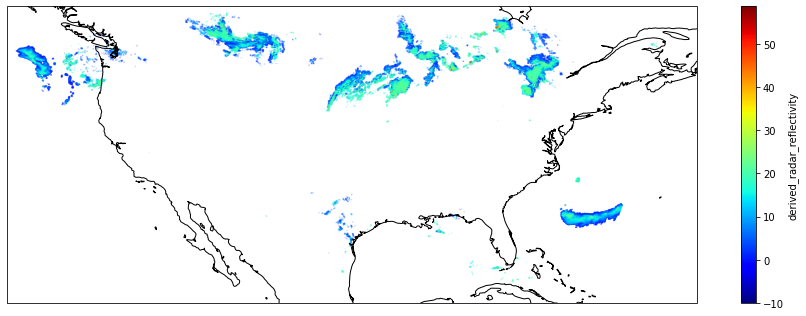

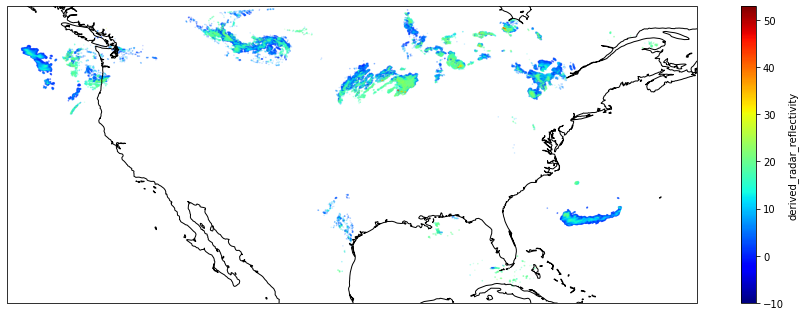

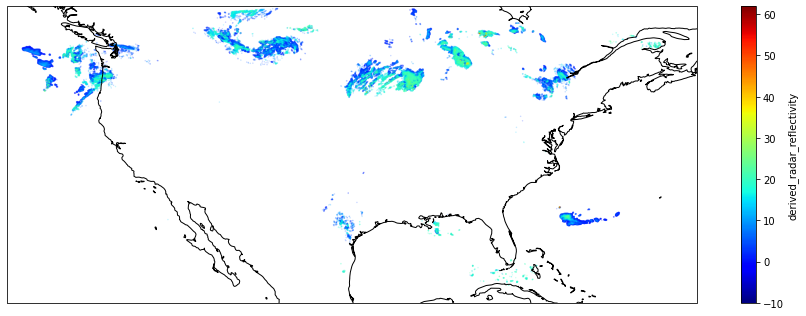

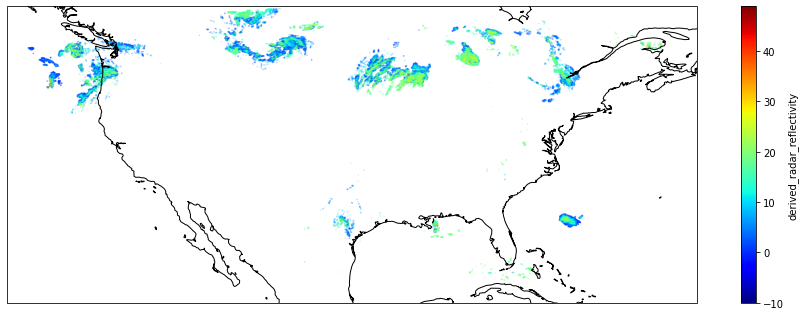

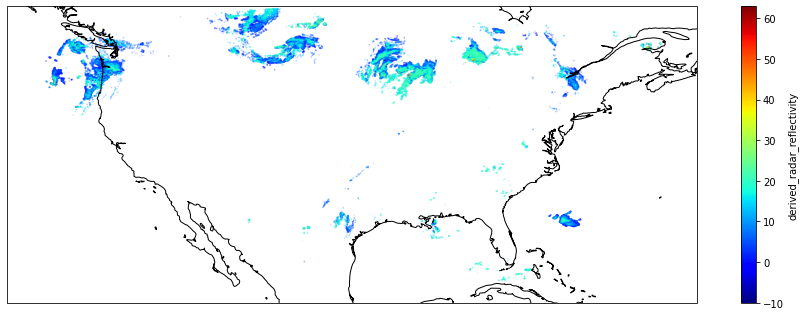

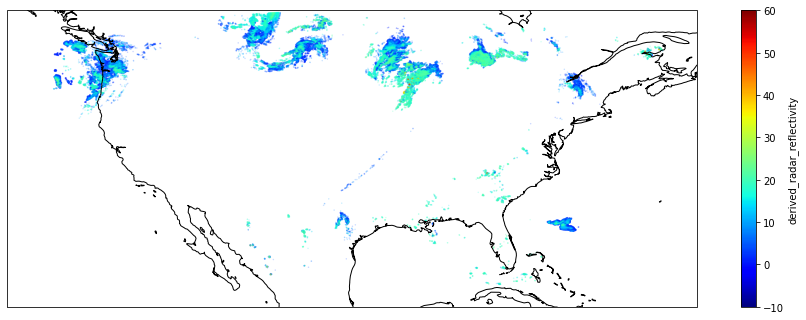

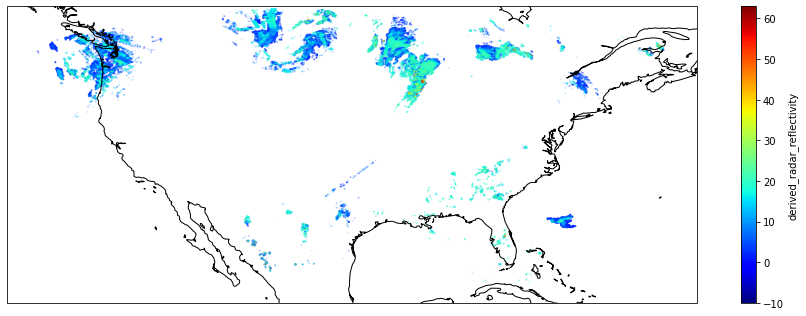

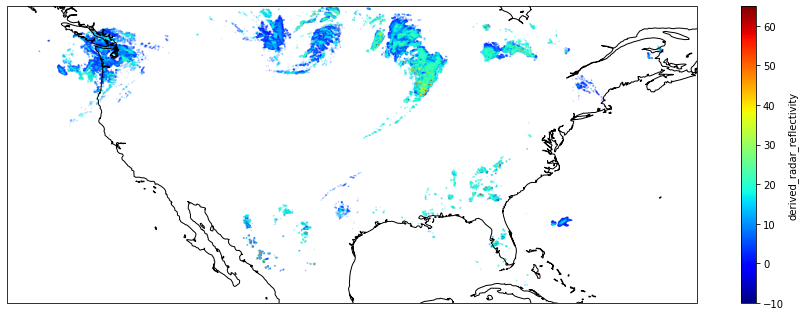

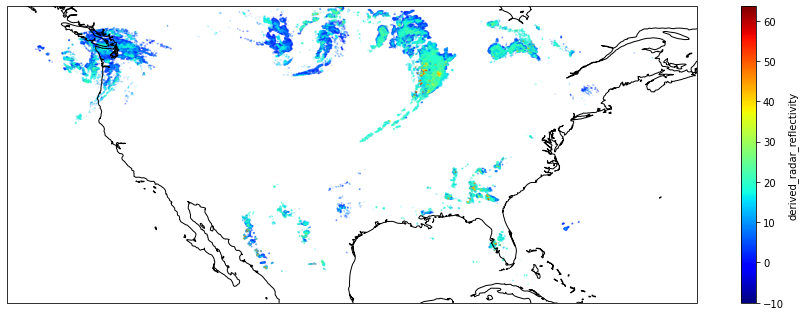

<Figure size 432x288 with 0 Axes>

In [7]:
def scatter_plot(ds: xr.Dataset, parameter: str, **kwargs):
    columns = {
        v.attrs["GRIB_shortName"]: v.attrs["long_name"].lower().replace(" ", "_") for v in ds.data_vars.values()
    }
    for vt, df in ds.to_dataframe().rename(columns=columns).groupby("valid_time"):
        plt.rcParams["axes.grid"] = True
        ax = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
        plt.figure(vt.value)

        ax.coastlines("50m")

        ax.set_extent(
            [
                *df["longitude"].agg(["min", "max"]),
                *df["latitude"].agg(["min", "max"]),
            ],
            ccrs.PlateCarree(),
        )

        df.plot(
            kind="scatter",
            y="latitude",
            x="longitude",
            c=parameter,
            ax=ax,
            alpha=np.where(df[parameter] > 0, 0.2, 0),
            cmap=plt.get_cmap("jet"),
            s=0.25,
            figsize=(16, 12),
            **kwargs,
        )


drr.pipe(scatter_plot, parameter="derived_radar_reflectivity")